<a href="https://colab.research.google.com/github/Avksent/Netology/blob/main/Final_Block.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.  
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

Требуется выполнить следующее задание:
Задания
1. Загрузите файл HR.csv в pandas dataframe
2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.  
Определите две самые скоррелированные и две наименее
скоррелированные переменные.
4. Рассчитайте сколько сотрудников работает в каждом
департаменте.
5. Показать распределение сотрудников по зарплатам.
6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности.
7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом.
8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов
9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)  
Оценить качество модели на тестовой выборки
10. Загрузить jupyter notebook с решение на github и прислать ссылку

Итого - максимум 85 баллов  
Для зачета необходимо набрать минимум 55

# Решение

## 1. Загрузите файл HR.csv в pandas dataframe

In [ ]:
# Импорт библиотек
import pandas as pd
# Загрузка файла как DF
hr_df = pd.read_csv('HR.csv')
hr_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
hr_df.info()
# пропусков нет, типы данных приемлимые

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## 2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [ ]:
# Выведем основные статистики (часть данных нехватает)
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# напишем свою функцию
pd.options.mode.chained_assignment = None
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
def stats(data):
    '''Функция принимает DataFrame (data) и рассчитывает базовые статистики и
    возвращает DataFrame для каждого столбца data:
      * min - минимальное значение
      * max - максимальное значение
      * range - размах
      * mean - среднее
      * mode - мода
      * median - медианное значение
      * disp - размах
      * std - стпандартное отклонение
      * q1 - первый квартиль
      * q2 - второй квартиль
      * q3 - третий квартиль
      * unique - список уникальных значений
      * value_counts - частотный анализ данных
    '''
    dfr = pd.DataFrame()
    dfr = pd.DataFrame(data, index =['min', 'max', 'range','mean','mode','median','disp','std','q1','q2','q3','unique','value_counts'])
    for series in data:
      if is_numeric_dtype(dfr[series]):
        dfr[series].loc['min'] = data[series].min()
        dfr[series].loc['max'] = data[series].max()
        dfr[series].loc['range'] = data[series].max() - data[series].min()
        dfr[series].loc['mean'] = data[series].mean()
        dfr[series].loc['mode'] = data[series].mode()[0]
        dfr[series].loc['median'] = data[series].median()
        dfr[series].loc['disp'] = data[series].var()
        dfr[series].loc['std'] = data[series].std()
        dfr[series].loc['q1'] = data[series].quantile(q=1/4)
        dfr[series].loc['q2'] = data[series].quantile(q=1/2)
        dfr[series].loc['q3'] = data[series].quantile(q=3/4)
        dfr[series].loc['q3'] = data[series].quantile(q=3/4)
      elif is_string_dtype(dfr[series]):
        dfr[series].loc['mode'] = data[series].mode()[0]
        dfr[series].loc['value_counts'] = data[series].reset_index().values.tolist()
        dfr[series].loc['unique'] = data[series].unique()


    return dfr


In [ ]:
hr_df_stats = stats(hr_df)
hr_df_stats

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,NaN,NaN
range,0.910000,0.640000,5.000000,214.000000,8.000000,1.000000,1.000000,1.000000,NaN,NaN
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000,sales,low
median,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
disp,0.061817,0.029299,1.519284,2494.313175,2.131998,0.123706,0.181411,0.020817,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
q1,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
q2,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN


## Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

<ipython-input-6-21957c492f3a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hr_df.corr(), annot=True)


<Axes: >

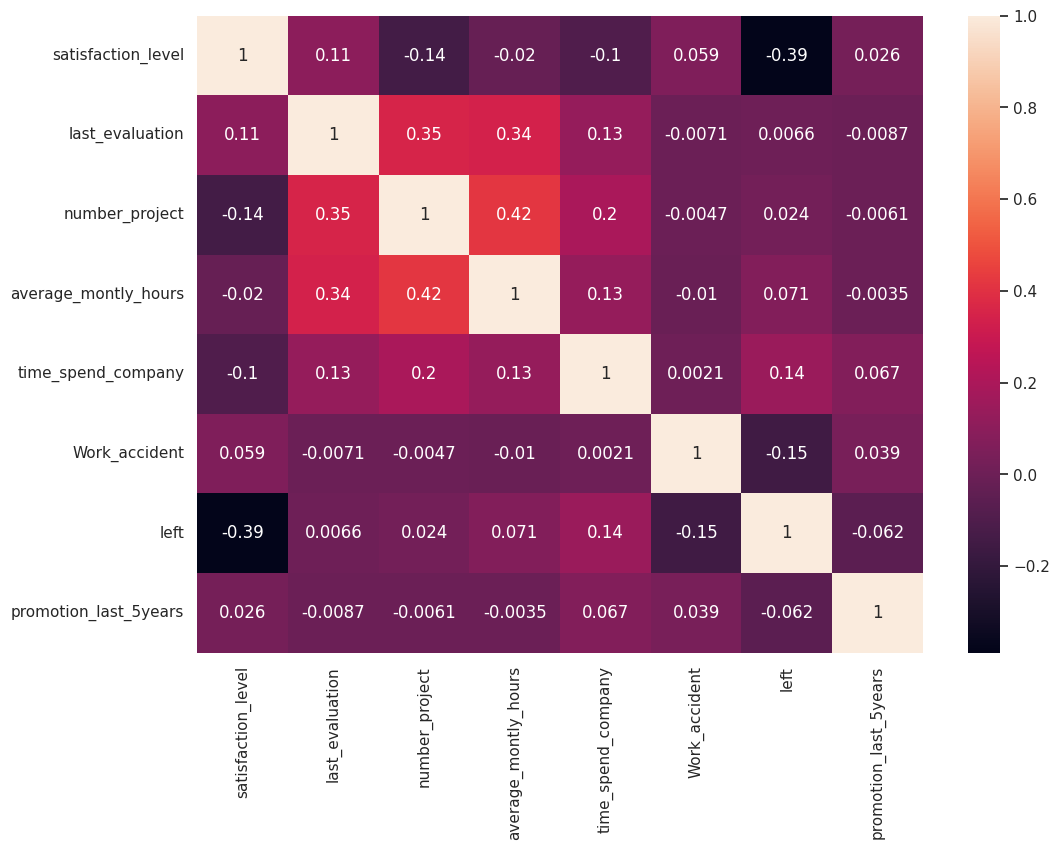

In [ ]:
# и визулизируем через тепловую карту
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(hr_df.corr(), annot=True)

In [ ]:
# соберём данные и отсортируем их в порядке убывания
cor_table = hr_df.corr().abs()
unst = cor_table.unstack()
sorted_cor_table = unst.sort_values(kind="quicksort", ascending=False)

print(sorted_cor_table.head(50))
# максимальная коррелиция наблюдается между столбцами [number_project - average_montly_hours] и [average_montly_hours - number_project]
# минимальная коррелиция наблюдается между столбцами [Work_accident - average_montly_hours]

satisfaction_level     satisfaction_level       1.000000
last_evaluation        last_evaluation          1.000000
left                   left                     1.000000
Work_accident          Work_accident            1.000000
time_spend_company     time_spend_company       1.000000
average_montly_hours   average_montly_hours     1.000000
number_project         number_project           1.000000
promotion_last_5years  promotion_last_5years    1.000000
number_project         average_montly_hours     0.417211
average_montly_hours   number_project           0.417211
satisfaction_level     left                     0.388375
left                   satisfaction_level       0.388375
last_evaluation        number_project           0.349333
number_project         last_evaluation          0.349333
average_montly_hours   last_evaluation          0.339742
last_evaluation        average_montly_hours     0.339742
time_spend_company     number_project           0.196786
number_project         time_spe

<ipython-input-7-1514abd5c8fe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_table = hr_df.corr().abs()


## 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [ ]:
df_hr_departmen_counts = hr_df.groupby(['department']).size().reset_index()
df_hr_departmen_counts.columns = ['department', 'Number_of_employees']
df_hr_departmen_counts

,department,Number_of_employees
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


## 5. Показать распределение сотрудников по зарплатам.

In [ ]:
hr_df_by_salary = hr_df.groupby('salary')['salary'].count()
hr_df_by_salary

salary
high      1237
low       7316
medium    6446
Name: salary, dtype: int64

[Text(0, 0, '1237'), Text(0, 0, '7316'), Text(0, 0, '6446')]

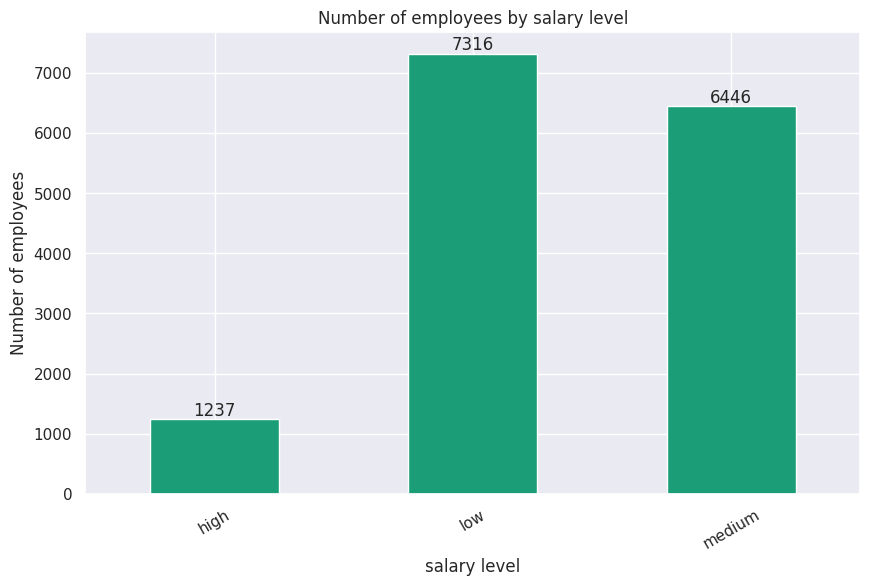

In [ ]:
bp = hr_df_by_salary.plot(kind='bar', title = 'Number of employees by salary level', xlabel="salary level", ylabel="Number of employees", figsize = (10,6), cmap='Dark2', rot = 30);
bp.bar_label (bp.containers [ 0 ])

## 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.

In [ ]:
hr_df_salary_by_department = hr_df.groupby([hr_df['department'],hr_df['salary']])[['salary']].count().unstack()
hr_df_salary_by_department

salary             
salary        high   low medium
department                     
IT              83   609    535
RandD           51   364    372
accounting      74   358    335
hr              45   335    359
management     225   180    225
marketing       80   402    376
product_mng     68   451    383
sales          269  2099   1772
support        141  1146    942
technical      201  1372   1147

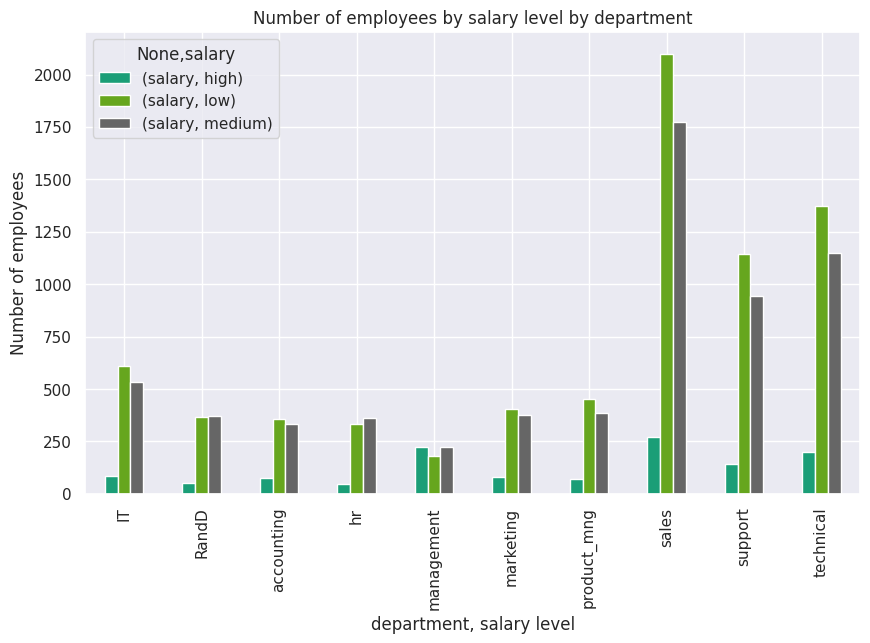

In [ ]:
bp = hr_df_salary_by_department.plot(kind='bar', title = 'Number of employees by salary level by department', xlabel="department, salary level", ylabel="Number of employees", figsize = (10,6), cmap='Dark2', rot = 90);
# bp.bar_label (bp.containers [ 0 ]);

## 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

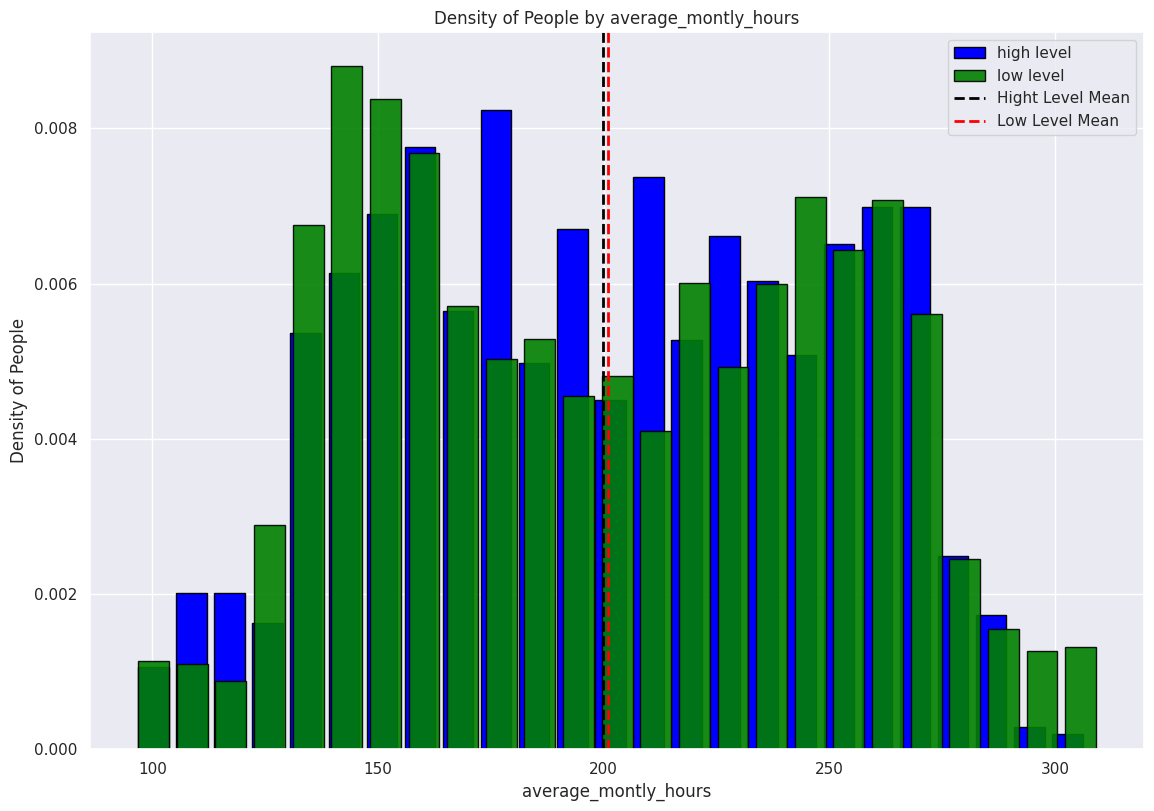

In [ ]:
df_high = list(hr_df.loc[hr_df['salary'] == 'high']['average_montly_hours'])
df_low = list(hr_df.loc[hr_df['salary'] == 'low']['average_montly_hours'])

import matplotlib.pyplot as plt
from statistics import mean


binss = 25
plt.hist(df_high, bins=binss, density=True, rwidth= .8, edgecolor='black', color='blue', label='high level', alpha=1);
plt.hist(df_low, bins=binss, density=True, rwidth= .8, edgecolor='black', color='green', label='low level', alpha=0.9);

plt.axvline(mean(df_high), color='black', linestyle='dashed', linewidth=2, label='Hight Level Mean')
plt.axvline(mean(df_low), color='red', linestyle='dashed', linewidth=2, label='Low Level Mean')

plt.legend(loc='upper right')

plt.title('Density of People by average_montly_hours')
plt.xlabel('average_montly_hours')
plt.ylabel('Density of People')

plt.tight_layout()
plt.show()
#на первый взгляд разница если и есть, то незначительная

In [ ]:
from scipy import stats

def h0_mean(data1, data2, alpha = 0.05):
  # H0 - среднее значение двух выборок существенно отличаются
  # H1 - среднее значение двух выборок приблизительно равны
  stat_value, p_value = stats.ttest_ind(data1, data2)
  print(f"Статистика = {stat_value:.5f}, p = {p_value:.5f}")
  if p_value < alpha:
    print("Отклоняем нулевую гипотезу. Можем предположить, что различие между выборками (их средними) незначительно.")
  else:
    print("Принимаем нулевую гипотезу. Предполагаем, что различие между выборками (их средними) незначительно.")

h0_mean(df_high, df_low, 0.001)
# Вывод - различие по уровню зарплат в зависимости от времени работы отсутствует

Статистика = -0.72887, p = 0.46610
Принимаем нулевую гипотезу. Предполагаем, что различие между выборками (их средними) незначительно.


## 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [ ]:
df_left = hr_df.loc[hr_df['left'] == 1]
df_left_promotion_last_5years = len(df_left.loc[df_left['promotion_last_5years'] == 1])/len(df_left)
df_left_satisfaction_level = df_left['satisfaction_level'].mean()
df_left_number_project = df_left['number_project'].mean()

df_not_left = hr_df.loc[hr_df['left'] == 0]
df_not_left_promotion_last_5years = len(df_not_left.loc[df_not_left['promotion_last_5years'] == 1])/len(df_not_left)
df_not_left_satisfaction_level = df_not_left['satisfaction_level'].mean()
df_not_left_number_project = df_not_left['number_project'].mean()


print(f'Показатели среди уволившихся сотрудников \n- Доля сотрудников с повышением за последние 5 лет: {df_left_promotion_last_5years} \n- Средняя степень удовлетворенности: {df_left_satisfaction_level} \n- Среднее количество проектов: {df_left_number_project}')

print(f'Показатели среди не уволившихся сотрудников \n- Доля сотрудников с повышением за последние 5 лет: {df_not_left_promotion_last_5years} \n- Средняя степень удовлетворенности: {df_not_left_satisfaction_level} \n- Среднее количество проектов: {df_not_left_number_project}')


Показатели среди уволившихся сотрудников 
- Доля сотрудников с повышением за последние 5 лет: 0.005320638476617194 
- Средняя степень удовлетворенности: 0.4400980117614114 
- Среднее количество проектов: 3.8555026603192384
Показатели среди не уволившихся сотрудников 
- Доля сотрудников с повышением за последние 5 лет: 0.026251312565628283 
- Средняя степень удовлетворенности: 0.666809590479524 
- Среднее количество проектов: 3.786664333216661


## 9. Регрессия
- Разделить данные на тестовую и обучающую выборки
- Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
- Оценить качество модели на тестовой выборки

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# обозначим параметры по осям
X = hr_df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]
y = pd.array(hr_df['left'])

# разобьём данные на данные для построения регрессионной модели и тестовые данные в пропорции 0.7 к 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_const = sm.add_constant(X_train) # техническая особенность библиотеки

# построим модель (обучим) и выведем данные
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
4495,0,0
4496,0,1
4497,0,0
4498,0,0


In [ ]:
from sklearn.metrics import accuracy_score
print(f'Точность предсказательной модели: {accuracy_score(y_test, lda.predict(X_test))}')
# показано высокое качество предсказательной модели

Точность предсказательной модели: 0.7557777777777778


ValueError: ignored

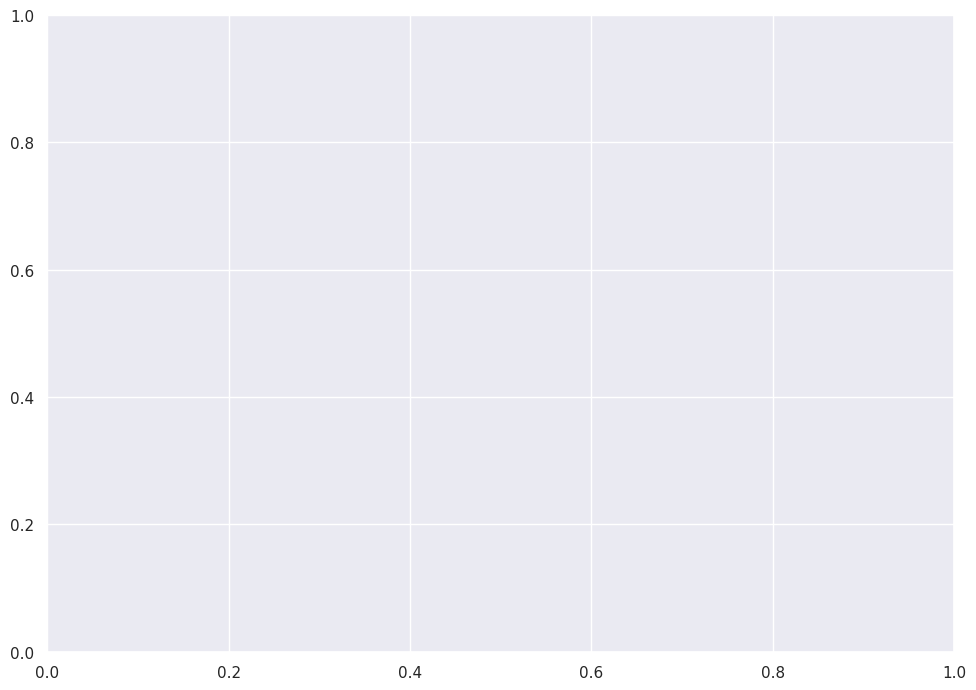

In [ ]:
y_pred = lda.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
6723,0.65,0.96,5,226,2,1,0,0
6473,0.88,0.80,3,166,2,0,0,0
4679,0.69,0.98,3,214,2,0,0,0
862,0.41,0.47,2,154,3,0,1,0
7286,0.87,0.76,5,254,2,1,0,0
...,...,...,...,...,...,...,...,...
13388,0.85,0.81,4,260,3,0,0,0
10463,0.21,0.43,2,249,3,0,0,0
5331,0.78,0.53,3,156,3,0,0,0
7499,0.93,0.58,5,238,2,0,0,0


## 10. Загрузить jupyter notebook с решение на github и прислать ссылку